11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 6s 9ms/step - loss: 0.0634
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0486
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0455
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0438
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0428
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0420
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0414
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0408
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0403
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0398
Epoch 1/10
469/469 [==============================] - 90s 187ms/step - loss: 0.0683
Epoch 2/10
469/469 [================

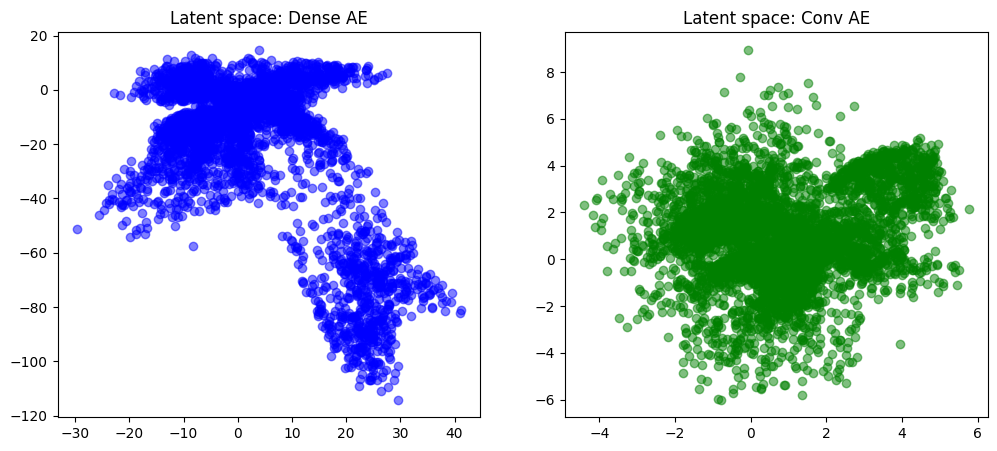

1/1 [==============================] - 0s 25ms/step


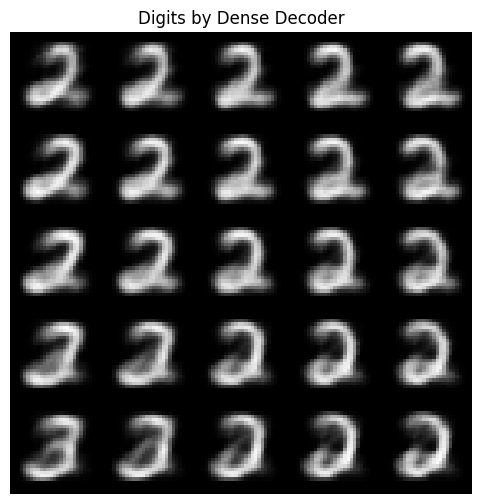

1/1 [==============================] - 0s 33ms/step


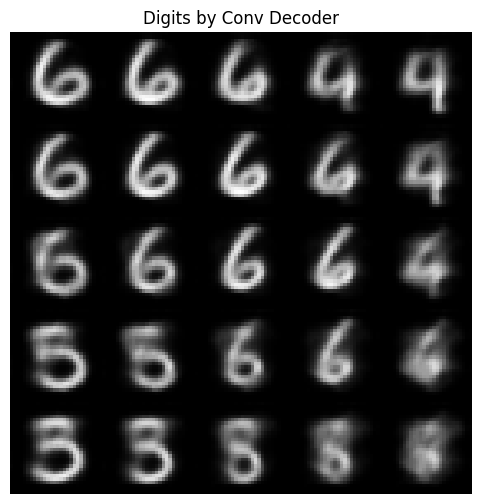


✅ Dense и Conv Autoencoders обучены и визуализированы — часть 1 завершена.


In [1]:
"""
Autoencoders on MNIST (by Polina Kruglova)

✅ В этом ноутбуке реализованы:
- Полносвязный автокодировщик (Dense AE)
- Сверточный автокодировщик (Conv AE)
- Сравнение их скрытых пространств
- Визуализация сгенерированных изображений

Используется TensorFlow 2.15, Keras, MNIST
"""


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import (Input, Dense, Flatten, Reshape, Conv2D,
                                     Conv2DTranspose, LeakyReLU, BatchNormalization)
import numpy as np
import matplotlib.pyplot as plt
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Загрузка и нормализация данных
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test = np.reshape(x_test, (-1, 28, 28, 1))

# Функция визуализации результатов декодера

def show_latent_grid(decoder, title="Generated Digits"):
    n = 5
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    for i in range(n):
        for j in range(n):
            z_sample = np.array([[2 * (i - n//2) / n, 2 * (j - n//2) / n]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit
    plt.figure(figsize=(6, 6))
    plt.imshow(figure, cmap="gray")
    plt.axis("off")
    plt.title(title)
    plt.show()

# ---------- Dense Autoencoder ----------

input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(2)(x)

encoded_input = Input(shape=(2,))
x = Dense(64, activation='relu')(encoded_input)
x = Dense(128, activation='relu')(x)
x = Dense(784, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

encoder_dense = keras.Model(input_img, encoded, name="encoder_dense")
decoder_dense = keras.Model(encoded_input, decoded, name="decoder_dense")
autoencoder_dense = keras.Model(input_img, decoder_dense(encoder_dense(input_img)), name="autoencoder_dense")

autoencoder_dense.compile(optimizer='adam', loss='mse')
autoencoder_dense.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True)

# ---------- Conv Autoencoder ----------

def conv_encoder(xin):
    x = Conv2D(32, 3, activation='relu', padding='same', strides=2)(xin)
    x = Conv2D(64, 3, activation='relu', padding='same', strides=2)(x)
    x = Flatten()(x)
    return Dense(2)(x)

def conv_decoder(z):
    x = Dense(7 * 7 * 64, activation='relu')(z)
    x = Reshape((7, 7, 64))(x)
    x = Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')(x)
    x = Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu')(x)
    return Conv2DTranspose(1, 3, padding='same', activation='sigmoid')(x)

input_conv = Input(shape=(28, 28, 1))
z = conv_encoder(input_conv)
encoder_conv = keras.Model(input_conv, z, name="encoder_conv")

input_z = Input(shape=(2,))
decoded_img = conv_decoder(input_z)
decoder_conv = keras.Model(input_z, decoded_img, name="decoder_conv")

autoencoder_conv = keras.Model(input_conv, decoder_conv(encoder_conv(input_conv)), name="autoencoder_conv")
autoencoder_conv.compile(optimizer='adam', loss='mse')
autoencoder_conv.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True)

# ---------- Визуализация скрытых пространств ----------

z_dense = encoder_dense.predict(x_test[:6000])
z_conv = encoder_conv.predict(x_test[:6000])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(z_dense[:, 0], z_dense[:, 1], c='blue', alpha=0.5)
plt.title("Latent space: Dense AE")
plt.subplot(1, 2, 2)
plt.scatter(z_conv[:, 0], z_conv[:, 1], c='green', alpha=0.5)
plt.title("Latent space: Conv AE")
plt.show()

# ---------- Визуализация генерации ----------

show_latent_grid(decoder_dense, title="Digits by Dense Decoder")
show_latent_grid(decoder_conv, title="Digits by Conv Decoder")

print("\n✅ Dense и Conv Autoencoders обучены и визуализированы — часть 1 завершена.")


Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 266.8123 - reconstruction_loss: 203.0459 - kl_loss: 10.4333
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 178.4579 - reconstruction_loss: 171.0876 - kl_loss: 4.8074
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 170.8428 - reconstruction_loss: 164.8824 - kl_loss: 4.7741
Epoch 4/10
469/469 [==============================] - 5s 12ms/step - loss: 167.7182 - reconstruction_loss: 162.3487 - kl_loss: 4.8870
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 166.2180 - reconstruction_loss: 160.7158 - kl_loss: 4.9600
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 164.7567 - reconstruction_loss: 159.4403 - kl_loss: 5.0402
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 163.5957 - reconstruction_loss: 158.3416 - kl_loss: 5.0930
Epoch 8/10
469/469 [==============================] - 5s 10ms

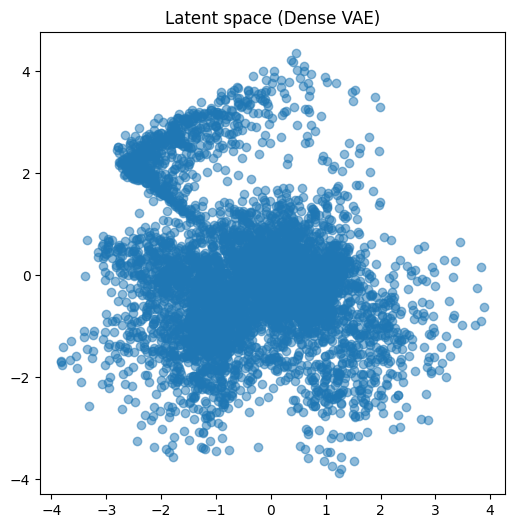

1/1 [==============================] - 0s 20ms/step


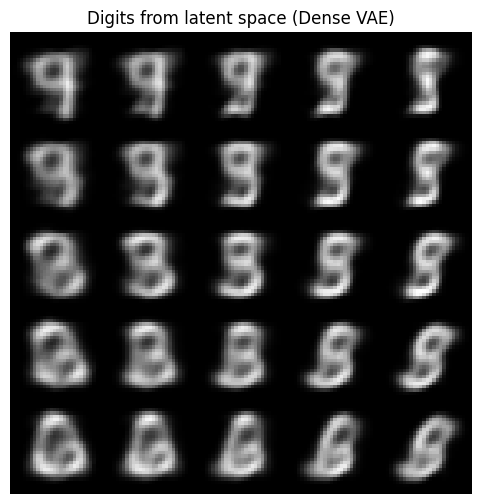


✅ Dense VAE обучен и визуализирован — часть 2 завершена.


In [2]:
"""
Variational Autoencoders on MNIST (by Polina Kruglova)

✅ В этом ноутбуке реализованы:
- VAE (Dense)
- Conv VAE
- Sampling слой
- Визуализация скрытого пространства и генерации изображений

Используется TensorFlow >=2.15, Keras, MNIST
"""

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Загрузка и нормализация данных
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test = np.reshape(x_test, (-1, 28, 28, 1))

latent_dim = 2

# Sampling слой
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# ---------- VAE (Dense) ----------

def build_dense_vae():
    encoder_inputs = keras.Input(shape=(28, 28, 1))
    x = layers.Flatten()(encoder_inputs)
    x = layers.Dense(128, activation='relu')(x)
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
    z = Sampling()([z_mean, z_log_var])

    encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder_dense")

    latent_inputs = keras.Input(shape=(latent_dim,))
    x = layers.Dense(128, activation='relu')(latent_inputs)
    x = layers.Dense(784, activation='sigmoid')(x)
    decoder_outputs = layers.Reshape((28, 28, 1))(x)
    decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder_dense")

    class VAE(keras.Model):
        def __init__(self, encoder, decoder, **kwargs):
            super().__init__(**kwargs)
            self.encoder = encoder
            self.decoder = decoder
            self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
            self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
            self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

        def train_step(self, data):
            if isinstance(data, tuple):
                data = data[0]
            with tf.GradientTape() as tape:
                z_mean, z_log_var, z = self.encoder(data)
                reconstruction = self.decoder(z)
                reconstruction_loss = tf.reduce_mean(
                    tf.reduce_sum(keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2))
                )
                kl_loss = -0.5 * tf.reduce_mean(
                    tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
                )
                total_loss = reconstruction_loss + kl_loss
            grads = tape.gradient(total_loss, self.trainable_weights)
            self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
            self.total_loss_tracker.update_state(total_loss)
            self.reconstruction_loss_tracker.update_state(reconstruction_loss)
            self.kl_loss_tracker.update_state(kl_loss)
            return {
                "loss": self.total_loss_tracker.result(),
                "reconstruction_loss": self.reconstruction_loss_tracker.result(),
                "kl_loss": self.kl_loss_tracker.result(),
            }

    vae = VAE(encoder, decoder)
    vae.compile(optimizer=keras.optimizers.Adam())
    return vae, encoder, decoder

vae_dense, encoder_dense, decoder_dense = build_dense_vae()
vae_dense.fit(x_train, epochs=10, batch_size=128)

# Визуализация латентного пространства
z_mean, _, _ = encoder_dense.predict(x_test[:6000])
plt.figure(figsize=(6, 6))
plt.scatter(z_mean[:, 0], z_mean[:, 1], alpha=0.5)
plt.title("Latent space (Dense VAE)")
plt.show()

# Генерация изображений из latent space
n = 5
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
for i in range(n):
    for j in range(n):
        z_sample = np.array([[2 * (i - 2) / n, 2 * (j - 2) / n]])
        x_decoded = decoder_dense.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit
plt.figure(figsize=(6, 6))
plt.imshow(figure, cmap="gray")
plt.axis("off")
plt.title("Digits from latent space (Dense VAE)")
plt.show()

print("\n✅ Dense VAE обучен и визуализирован — часть 2 завершена.")
